In [1]:
import photon_mosaic_demo as pm
import photon_mosaic_demo.widgets as pmw
import numpy as np
import spikeinterface.widgets as sw
%matplotlib widget

In [2]:
imaging_noise = pm.NoiseGeneratorImaging(durations=[10000])

In [3]:
imaging_gt = pm.GroundTruthImaging(durations=[500], mode="gaussian")

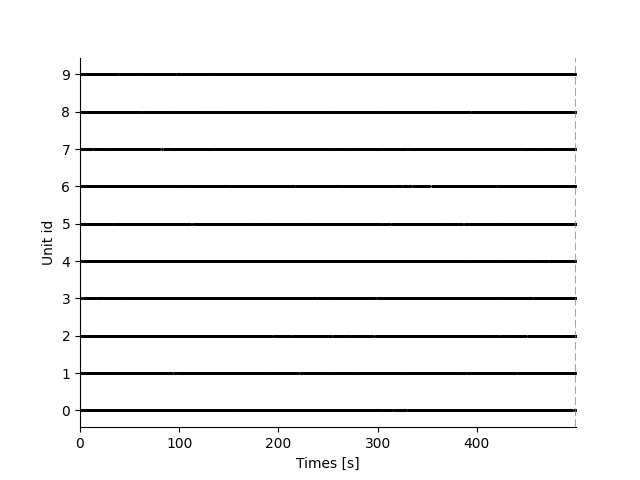

In [4]:
w = sw.plot_rasters(imaging_gt.sorting, backend="matplotlib")

In [6]:
imaging_cached = imaging_gt.save(folder="gt", overwrite=True, chunk_duration="1s", n_jobs=4, verbose=True)

write_binary_imaging 
engine=process - n_jobs=4 - samples_per_chunk=30 - chunk_memory=2.29 MiB - total_memory=9.16 MiB - chunk_duration=1.00s


write_binary_imaging (workers: 4 processes):   0%|          | 0/500 [00:00<?, ?it/s]

In [7]:
w = pmw.plot_imaging_series(imaging_cached, backend="ipywidgets")

In [2]:
imaging_gt, _ = pm.generate_ground_truth_video(duration=100)

In [3]:
imaging_gt.get_num_samples()

3000

In [4]:
imaging_gt.get_num_pixels()

np.int64(10000)

In [5]:
from roiextractors.extractorlist import imaging_extractor_dict

In [6]:
import photon_mosaic_demo.extractors as pmext

In [7]:
imaging = pmext.BaseROIExtractorImaging(
    imaging_name="ScanImageTiffImaging", 
    file_path="/home/alessio/Downloads/neuron4_00001.tif",
    channel_name="Channel 2",
    plane_name="0"
)

In [8]:
from photon_mosaic_demo import write_binary_imaging

In [9]:
imbin = imaging_gt.save(folder="save_test", n_jobs=4, overwrite=True)

write_binary_imaging 
engine=process - n_jobs=4 - samples_per_chunk=30 - chunk_memory=2.29 MiB - total_memory=9.16 MiB - chunk_duration=1.00s


write_binary_imaging (workers: 4 processes):   0%|          | 0/100 [00:00<?, ?it/s]

In [10]:
imbin

BinaryFolderImaging
  Number of segments: 1 
  Sample shape: 100 rows x 100 columns  
  Number of samples: 3,000 
  Sampling rate: 30.0Hz
  Duration: 1.7min
  Imaging data memory: 228.9MiB (float64 dtype)

In [11]:
write_binary_imaging(imaging_gt, file_paths="im_bin_test.raw", chunk_size=100, n_jobs=4)

write_binary_imaging (workers: 4 processes):   0%|          | 0/30 [00:00<?, ?it/s]

In [21]:
imaging_bin = pm.read_binary("im_bin_test.raw", image_shape=imaging_gt.image_shape, dtype=imaging_gt.get_dtype(), sampling_frequency=imaging_gt.sampling_frequency)

In [22]:
imaging_bin

BinaryImaging
  Number of segments: 1 
  Sample shape: 100 rows x 100 columns  
  Number of samples: 3,000 
  Sampling rate: 30.0Hz
  Duration: 1.7min
  Imaging data memory: 228.9MiB (float64 dtype)

In [28]:
video = imaging.get_series(start_frame=10, end_frame=20)

In [29]:
video.shape

(10, 800, 800)

In [30]:
imaging.image_shape

array([800, 800])

In [31]:
imaging.get_num_samples()

118

In [17]:
w = pmw.plot_imaging_series(imaging_gt, backend="ipywidgets")

In [33]:
imaging.to_dict()

{'class': 'photon_mosaic_demo.extractors.baseroiextractors.BaseROIExtractorImaging',
 'module': 'photon_mosaic_demo',
 'version': '0.1.0',
 'kwargs': {'imaging_name': 'ScanImageTiffImaging',
  'file_path': '/home/alessio/Downloads/neuron4_00001.tif',
  'channel_name': 'Channel 2',
  'plane_name': '0'},
 'annotations': {'name': 'ScanImageTiffImaging (ROIExtractors)'},
 'properties': {},
 'relative_paths': False}

In [34]:
imaging_loaded = pm.BaseImaging.from_dict(imaging.to_dict())

In [12]:
w = pmw.plot_imaging_series(imaging_gt, backend="ipywidgets")